**Fitting and Tuning Regressor Models**

In [1]:
# Import libraries
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from joblib import dump

**Data Handling and Exploration**

- Load sklearn diabetes bunch object into a Pandas df
- Assess features, datatypes, NaN presence 
- Plot appropriate histograms
- Split dataframe into a training and test set
- Define a correlation matrix
- Plot the correlation matrix with a Seaborn heatmap
- Use a Seaborn pairplot to assess values with the highest target correlation
- Prepare a feature set

In [2]:
# Load the scikit-learn diabetes bunch object into a variable
diabetes_data_bunch = datasets.load_diabetes()
print(diabetes_data_bunch.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
# Print out the description of the dataset
print(diabetes_data_bunch['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
# Load the diabetes features into a pandas dataframe with the proper column names
df = pd.DataFrame(data=diabetes_data_bunch.data, columns=diabetes_data_bunch.feature_names)
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [5]:
# Add the target variable to the dataframe
df['disease_prog'] = diabetes_data_bunch.target
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  disease_prog  
0   -0.002592  0.019907 -

In [6]:
# Examine the data types of the dataframe for any missing data
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           442 non-null    float64
 1   sex           442 non-null    float64
 2   bmi           442 non-null    float64
 3   bp            442 non-null    float64
 4   s1            442 non-null    float64
 5   s2            442 non-null    float64
 6   s3            442 non-null    float64
 7   s4            442 non-null    float64
 8   s5            442 non-null    float64
 9   s6            442 non-null    float64
 10  disease_prog  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


age             0
sex             0
bmi             0
bp              0
s1              0
s2              0
s3              0
s4              0
s5              0
s6              0
disease_prog    0
dtype: int64

In [7]:
# Fetch descriptive statistics for the numeric columns
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_prog
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


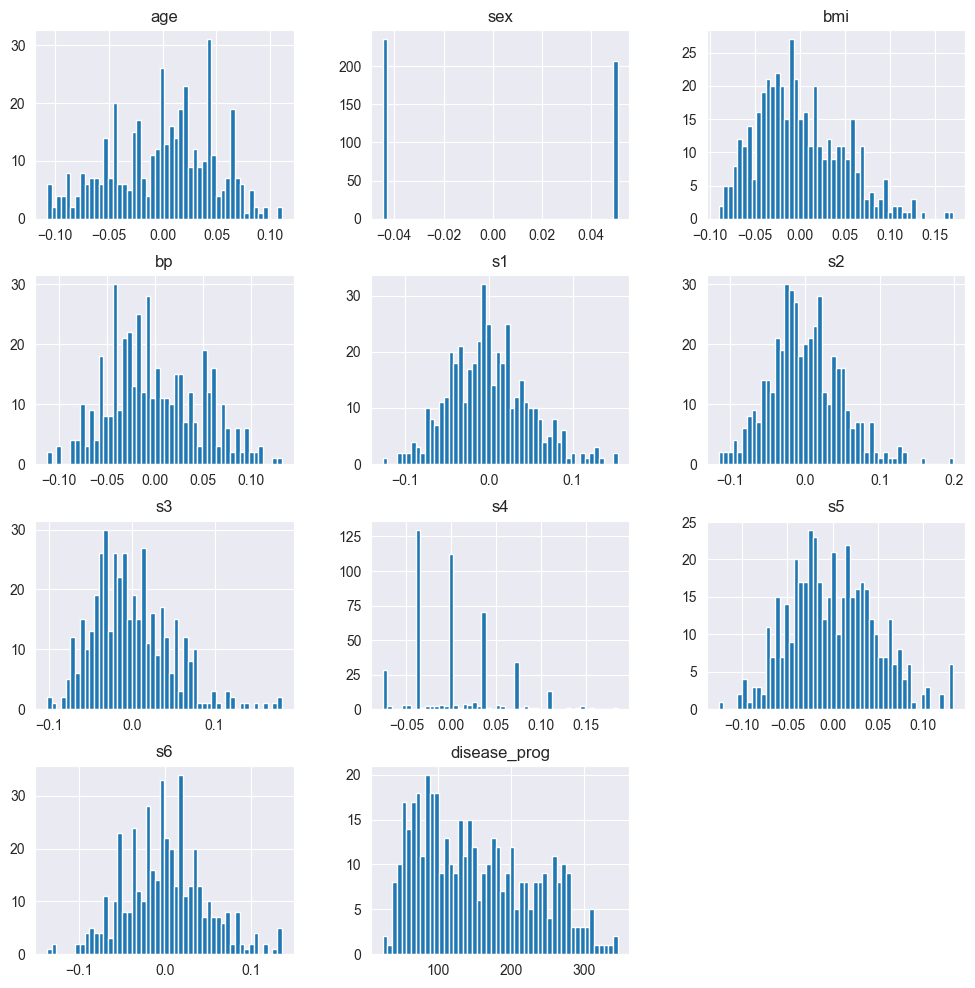

In [25]:
# Plot histograms for each column’s distribution
df.hist(bins=50, figsize = (12, 12))
plt.show()

In [9]:
# Define a correlation matrix
corr_matrix = df.corr()

In [10]:
# Look at values highly correlated with the target
corr_matrix['disease_prog'].sort_values(ascending=False)

disease_prog    1.000000
bmi             0.586450
s5              0.565883
bp              0.441482
s4              0.430453
s6              0.382483
s1              0.212022
age             0.187889
s2              0.174054
sex             0.043062
s3             -0.394789
Name: disease_prog, dtype: float64

<Axes: >

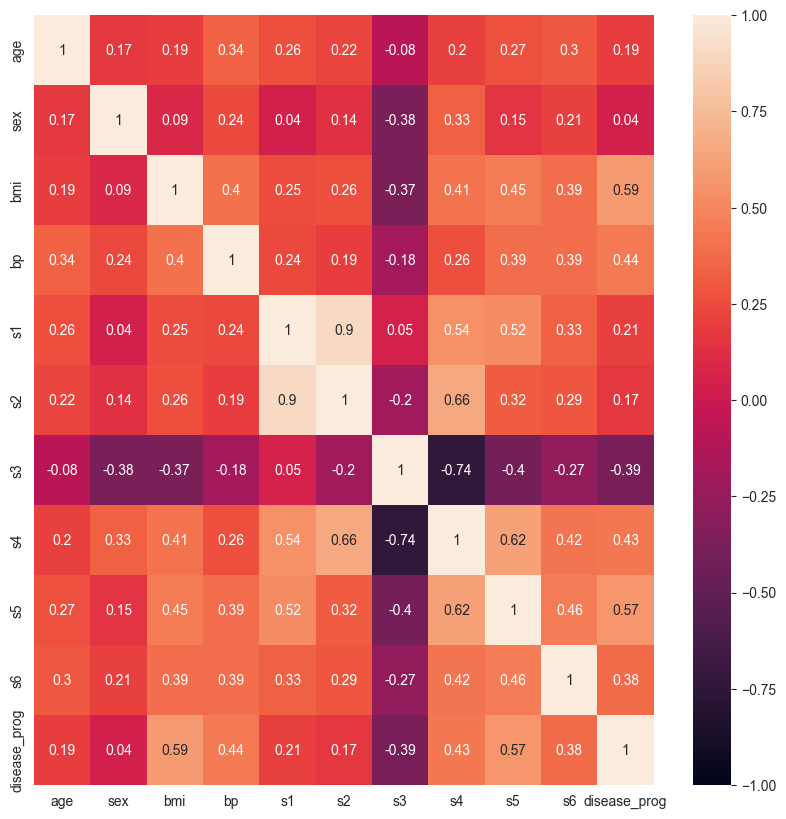

In [11]:
# Plot the correlation matrix with a Seaborn heatmap
fig = plt.figure(figsize= (10, 10))
sns.heatmap(corr_matrix.round(2), annot=True, vmin=-1, vmax=1)  # Setting vmin and vmax explicitly

In [12]:
# Prepare a feature set by dropping the target from the training dataframe
feature_set = df.drop(columns=['disease_prog'])
feature_set

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [13]:
# Copy training target into a new dataframe
target_set = df.disease_prog.copy()
target_set

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: disease_prog, Length: 442, dtype: float64

In [14]:
# Create a training and test set with 20% of data being in the test set
feature_train, feature_test, target_train, target_test = train_test_split(feature_set, target_set, test_size=0.2, random_state=4)
print(len(feature_train))  # Print debugging
print(len(feature_test))  # Print debugging
print(len(target_train))  # Print debugging
print(len(target_test))  # Print debugging

353
89
353
89


**Model Training**

- Train a linear regression model using the training set
- Print the RMSE of the regression model on the training set 
- Implement a cross_val_score on a decision tree regressor on the training set 
- Print out root mean and standard deviation of the cross-validation scores
- Repeat for a RandomForestRegressor
- Record which model performs better

In [15]:
# Train a linear regression model using the training set
lin_model = LinearRegression()  # Instantiate model
print(feature_train.shape)  # Print debugging
print(target_train.shape)  # Print debugging
lin_model.fit(feature_train, target_train)  # Fitting model

(353, 10)
(353,)


LinearRegression()

In [16]:
# Print the RMSE of the regression model on the training set
train_set_predicts = lin_model.predict(feature_train)
train_set_mse = mean_squared_error(target_train, train_set_predicts)
train_set_rmse = np.sqrt(train_set_mse)
print(f'RMSE of regression model on the training set is {train_set_rmse}')

RMSE of regression model on the training set is 53.50632821840622


In [17]:
# Implement a cross_val_score on a decision tree regressor and a random forest regressor on the training set
# For efficiency's sake, I will implement a function which calculates the cross validation scores, RMSE, mean, and standard deviation for both estimators
def get_regressor_scores(estimator):
    cross_val_scores = cross_val_score(estimator=estimator, X=feature_train, y=target_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cross_val_scores)
    
    print(f'Regressor model: {estimator.__class__.__name__}')
    print(f'Cross-validation scores: {list(cross_val_scores)}')
   
    # NOTE: Calculating the root mean and standard deviation of the RMSE metric derived from the cross validation scores
    print(f'Mean of RMSE scores: {rmse_scores.mean()}')
    print(f'Standard deviation of RMSE scores: {rmse_scores.std()}')
    print('\n')
    
tree_reg = DecisionTreeRegressor(random_state=4)  # Instantiate and set random state
random_forest = RandomForestRegressor(random_state=4)  # Supply same random state value

get_regressor_scores(tree_reg)

get_regressor_scores(random_forest)

Regressor model: DecisionTreeRegressor
Cross-validation scores: [-5134.802816901409, -6219.0, -8269.901408450703, -8747.371428571429, -5619.742857142857]
Mean of RMSE scores: 81.98990015966811
Standard deviation of RMSE scores: 8.707466567316573

Regressor model: RandomForestRegressor
Cross-validation scores: [-3440.7955746478874, -2691.762881690141, -3848.4929788732397, -3137.0362171428574, -3554.113132857143]
Mean of RMSE scores: 57.640470875765644
Standard deviation of RMSE scores: 3.4664498066849405


**Which model performs better?**
The mean of the cross-validated RMSE scores for the random forest regressor is lower than the mean of the cross-validated RMSE scores for the decision tree regressor.

I therefore conclude that because the root mean squared error is lower for the random forest regressor, the random forest regressor performed better.

This is consistent with what we generally ought to expect with regard to ensemble learning methodologies.   

**Model Tuning**

- Print out the parameters of the random forest model
- Run a grid search cross-validation 
- Print out the best parameters and the best performing model based on the grid search 
- Using the cv_results dictionary, print out the RMSE of each feature combination for comparison
- Print out the feature importances of the best performing grid search model
- Describe how it compares with the correlation matrix implemented previously

In [18]:
# Print out the parameters of the random forest model
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [19]:
# Run a grid search cross-validation with reasonable hyperparameter values
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=4),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [20]:
# Print out the best parameters and the best performing model based on the grid search
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 2, 'n_estimators': 30}
RandomForestRegressor(max_features=2, n_estimators=30, random_state=4)


In [21]:
# Using the cv_results dictionary, print out the RMSE of each feature combination for comparison
np.array(list(zip(grid_search.cv_results_['params'], np.sqrt(-grid_search.cv_results_['mean_test_score']))))
# NOTE: Minimum RMSE is 57.017159 at max_features 2, n_estimators 30, as reported above

array([[{'max_features': 2, 'n_estimators': 3}, 67.1176677114548],
       [{'max_features': 2, 'n_estimators': 10}, 60.097654570785515],
       [{'max_features': 2, 'n_estimators': 30}, 57.017158917680575],
       [{'max_features': 4, 'n_estimators': 3}, 63.75776670073829],
       [{'max_features': 4, 'n_estimators': 10}, 58.503561799770424],
       [{'max_features': 4, 'n_estimators': 30}, 57.54604478832787],
       [{'max_features': 6, 'n_estimators': 3}, 65.92865891382007],
       [{'max_features': 6, 'n_estimators': 10}, 58.61782545923566],
       [{'max_features': 6, 'n_estimators': 30}, 57.60398298634306],
       [{'max_features': 8, 'n_estimators': 3}, 68.06662695729214],
       [{'max_features': 8, 'n_estimators': 10}, 60.8462343105855],
       [{'max_features': 8, 'n_estimators': 30}, 59.36428277051438],
       [{'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
        67.48491113200103],
       [{'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
        60

In [22]:
# Print out the feature importances of the best performing grid search model
dict(zip(feature_train.columns, grid_search.best_estimator_.feature_importances_))

{'age': 0.0666947641009657,
 'sex': 0.017968763702963575,
 'bmi': 0.16949699737116497,
 'bp': 0.12590644834484926,
 's1': 0.07255509910825875,
 's2': 0.08442093150771728,
 's3': 0.09744000222462641,
 's4': 0.07612851209611113,
 's5': 0.20655750415684662,
 's6': 0.08283097738649634}

**Describe how it compares with the correlation matrix implemented earlier:**
- In the correlation matrix, the most-correlated feature in terms of the target variable was bmi
- However, in terms of feature importance in the random forest model, the most important feature of the best-performing model was s5
- It's noteworthy that s5 was the second most-correlated feature and bmi is the second most important feature
- The s3, s4, and s6 features have similar levels of feature importance and similar absolute values in the correlation matrix, though s3's correlation is negative
- The feature importance values and absolute correlation values 'map' to each other well: the least important features are also the least-correlated features by absolute value of correlation

**Model Evaluation**

- Document the best-performing model between a single feature model, and the models trained above
- Evaluate the best performing model against your test set
- Save your model for future use

**Document the best-performing model between the single feature model you trained in Assignment 1, and the models you trained in part 2 and 3 of this assignment.**
- The RMSE for a single-feature linear regression model was ~58.1796.
- The RMSE for the multi-feature linear regression model above was ~53.5063.
- The mean RMSE for the cross-validated decision tree regressor was ~89.9899.
- The mean RMSE for the cross-validated random forest regressor was ~57.6404.
- The RMSE for the best-performing tuned random forest regressor was ~57.0171.

I conclude that the best-performing model, with the lowest RMSE value, was the multi-feature linear regression model.

In [23]:
# Evaluate the best performing model against your test set by printing the RMSE of the regression model on the test set
test_set_predicts = lin_model.predict(feature_test)
test_set_mse = mean_squared_error(target_test, test_set_predicts)
test_set_rmse = np.sqrt(test_set_mse)
print(f'RMSE of multi-feature linear regression model on the test set is {test_set_rmse}')

RMSE of multi-feature linear regression model on the test set is 54.21584812943668


In [24]:
# Save model for future use using the joblib library
dump(lin_model, 'multiple_regression_model.joblib')

['multiple_regression_model.joblib']